In [89]:
!pip install pandas seaborn xlsxwriter scikit-learn==1.0.2

Defaulting to user installation because normal site-packages is not writeable


## Import libraries
We are using a new library called scikit-learn, originally created and released for free by researchers at the French national laboratory INRIA.

In [7]:
import numpy as np
import pandas as pd

import sklearn.pipeline
import sklearn.feature_extraction.text
import sklearn.naive_bayes
import sklearn.model_selection
import sklearn.metrics

## Load data
__For lab: change this so that it reads your data file.__
__You may have to use `pd.read_excel()` if you are working with an excel file__

__You may have to edit the original spreadsheet so that the first row is named 'input' and 'output' (instead of 'sentence' and 'sentiment' or 'headline' and 'category' for example) OR replace 'input' and 'output' in the code with whatever the columns are named__

In [11]:
data = pd.read_csv("spam_ham_dataset.csv")

In [12]:
data

,output,input,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0


In [13]:
data['output'].value_counts()

ham     3672
spam    1499
Name: output, dtype: int64

## Split into training and testing datasets
We want to randomly select 80% of this data to use to train the model, then use the remaining 20% to test how good the model is on examples it has not seen before.

In [14]:
input_train, input_test, output_train, output_test = sklearn.model_selection.train_test_split(data['input'], 
                                                                                             data['output'], 
                                                                                             test_size=0.2)

In [15]:
input_train, output_train

(261     Subject: nb real vallum , x . anax , l . evitr...
 3380    Subject: ethane election for september 2000\r\...
 1936    Subject: re : fw : feb - 01 invoice\r\ndaren -...
 4069    Subject: panenergy exchange deal - feb . 2000 ...
 3761    Subject: growing company ignored by wall stree...
                               ...                        
 3536    Subject: office xp - $ 60 convenes permian\r\n...
 3615    Subject: please print\r\nhi honey please print...
 337     Subject: enron / hpl nom for december 20 , 200...
 276     Subject: nvhcs bvy h ' y _ d _ roc _ 0 _ d _ 0...
 3183    Subject: organizational announcement\r\nwe are...
 Name: input, Length: 4136, dtype: object,
 261     spam
 3380     ham
 1936     ham
 4069     ham
 3761    spam
         ... 
 3536    spam
 3615     ham
 337      ham
 276     spam
 3183     ham
 Name: output, Length: 4136, dtype: object)

In [16]:
input_test, output_test

(4530    Subject: enron / hpl actuals for july 18 , 200...
 2887    Subject: hot _ sexdifferentiable\r\n- - = = - ...
 4637    Subject: tenaska iv outage update\r\nplease no...
 463     Subject: nom 5 / 1 ( revised again ) - eastran...
 2111    Subject: re : wed , 21 jan 2004 08 : 15 : 42 -...
                               ...                        
 3161    Subject: sale to shoreline\r\nfyi\r\n- - - - -...
 4984    Subject: paliourg less expensive charset = iso...
 342     Subject: re : physical storage\r\nwe don ' t h...
 4430    Subject: hp pavilion v 72 17 " crt monitor w /...
 4707    Subject: union carbide - seadrift\r\ndaren\r\n...
 Name: input, Length: 1035, dtype: object,
 4530     ham
 2887    spam
 4637     ham
 463      ham
 2111    spam
         ... 
 3161     ham
 4984    spam
 342      ham
 4430    spam
 4707     ham
 Name: output, Length: 1035, dtype: object)

## Create a blank model from a three-part pipeline and then train it with `model.fit()`


In [19]:
model = sklearn.pipeline.Pipeline([
    ('vect', sklearn.feature_extraction.text.CountVectorizer()),
    ('tfidf', sklearn.feature_extraction.text.TfidfTransformer()),
    ('clf', sklearn.naive_bayes.MultinomialNB()),
])


In [20]:
model.fit(input_train, output_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

## Testing the model on the other 20% of data
Remember the `input_test` dataset? We will use the `model.predict()` function to score those 1035 emails.

In [26]:
input_test

4530    Subject: enron / hpl actuals for july 18 , 200...
2887    Subject: hot _ sexdifferentiable\r\n- - = = - ...
4637    Subject: tenaska iv outage update\r\nplease no...
463     Subject: nom 5 / 1 ( revised again ) - eastran...
2111    Subject: re : wed , 21 jan 2004 08 : 15 : 42 -...
                              ...                        
3161    Subject: sale to shoreline\r\nfyi\r\n- - - - -...
4984    Subject: paliourg less expensive charset = iso...
342     Subject: re : physical storage\r\nwe don ' t h...
4430    Subject: hp pavilion v 72 17 " crt monitor w /...
4707    Subject: union carbide - seadrift\r\ndaren\r\n...
Name: input, Length: 1035, dtype: object

In [27]:
output_predicted = model.predict(input_test)

In [28]:
output_predicted

array(['ham', 'spam', 'ham', ..., 'ham', 'spam', 'ham'], dtype='<U4')

Remember that the 'true' labels for these are in `output_test`. They are in a slightly different format (array displayed horizontally versus a column displayed horizontally), but they are easy for the computer to compare.

In [29]:
output_test

4530     ham
2887    spam
4637     ham
463      ham
2111    spam
        ... 
3161     ham
4984    spam
342      ham
4430    spam
4707     ham
Name: output, Length: 1035, dtype: object

We can use `model.score()` by first inputting the 'true' labels, then the predictions. We get a percentage of the model's __accuracy__:

$accuracy = \frac{\mbox{number of correct predictions}}{\mbox{total number of items predicted}}$

In [30]:
print(model.score(output_test, output_predicted))

0.885024154589372


## The Confusion Matrix

But accruacy alone doesn't tell us everything: there could be way more false positives than false negatives. So we use the ___confusion matrix___, which is a 2x2 table of what kinds of correct vs incorrect predictions were made:

__NOTE: If you have more than two categories to predict, your confusion matrix will more complicated than a 2x2. The `tp, fn, fp, tn...` code won't work, but the next cell plotting the confusion matrix will work.__

In [38]:
confusion_matrix = sklearn.metrics.confusion_matrix(output_test, output_predicted, labels=model.classes_)
confusion_matrix

array([[740,   0],
       [119, 176]])

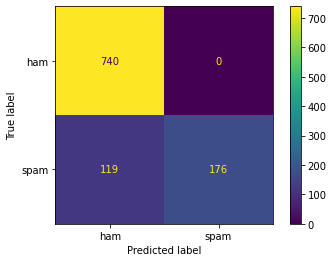

In [46]:
display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=model.classes_)
display.plot()


# Metrics of success and failure

___For lab: keep these if you only have two categories, delete if you have more___

In [39]:
tp, fn, fp, tn = confusion_matrix.flatten()
tp, fn, fp, tn

(740, 0, 119, 176)

In [41]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
accuracy

0.885024154589372

In [42]:
precision = tp / (tp + fp)
precision

0.8614668218859138

In [43]:
recall = tp / (tp + fn)
recall

1.0

In [44]:
specificity = tn / (tn + fp)
specificity

0.5966101694915255

___For lab: keep this if you have more than two categories, delete if you have only two___

In [47]:
print(sklearn.metrics.classification_report(output_test, output_predicted))

              precision    recall  f1-score   support

         ham       0.86      1.00      0.93       740
        spam       1.00      0.60      0.75       295

    accuracy                           0.89      1035
   macro avg       0.93      0.80      0.84      1035
weighted avg       0.90      0.89      0.87      1035



## For lab: manually exploring a few cases

Edit this list to add five or more text inputs that make sense for your model. It could be from the original dataset, or it could be something you come up with on your own.

In [86]:
text_list = ['Subject: I need this report by 9am!',
             'Subject: Buy peni$ pill$ 4 CHEAP',
             'Subject: YOUR ACCOUNT HAS BEEN HACKED',
             'Subject: Hi',
             'Subject: Hi sexy']

In [87]:
scores = model.predict_proba(text_list)
scores

array([[0.95777144, 0.04222856],
       [0.25106521, 0.74893479],
       [0.82188512, 0.17811488],
       [0.6598144 , 0.3401856 ],
       [0.47194171, 0.52805829]])

In [88]:
scores_dataframe = pd.DataFrame(scores, columns=model.classes_)
scores_dataframe

,ham,spam
0,0.957771,0.042229
1,0.251065,0.748935
2,0.821885,0.178115
3,0.659814,0.340186
4,0.471942,0.528058


## Output to excel

In [72]:
data_predicted = data[['input','output']].copy()
data_predicted.columns = ['input', 'output_ground_truth']
data_predicted

,input,output_ground_truth
0,Subject: enron methanol ; meter # : 988291\r\n...,ham
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",ham
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",ham
3,"Subject: photoshop , windows , office . cheap ...",spam
4,Subject: re : indian springs\r\nthis deal is t...,ham
...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,ham
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,ham
5168,Subject: calpine daily gas nomination\r\n>\r\n...,ham
5169,Subject: industrial worksheets for august 2000...,ham


In [73]:
data_predicted['output_predicted'] = model.predict(data_predicted['input'])
data_predicted

,input,output_ground_truth,output_predicted
0,Subject: enron methanol ; meter # : 988291\r\n...,ham,ham
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",ham,ham
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",ham,ham
3,"Subject: photoshop , windows , office . cheap ...",spam,spam
4,Subject: re : indian springs\r\nthis deal is t...,ham,ham
...,...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,ham,ham
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,ham,ham
5168,Subject: calpine daily gas nomination\r\n>\r\n...,ham,ham
5169,Subject: industrial worksheets for august 2000...,ham,ham


In [77]:
confidence = pd.DataFrame(model.predict_proba(data_predicted['input']), columns=model.classes_)
confidence

,ham,spam
0,0.999648,0.000352
1,0.999917,0.000083
2,0.997601,0.002399
3,0.203018,0.796982
4,0.998460,0.001540
...,...,...
5166,0.999984,0.000016
5167,0.999990,0.000010
5168,0.999991,0.000009
5169,0.997988,0.002012


In [78]:
confidence_max = probability.max(axis=1)
confidence_max

0       0.999648
1       0.999917
2       0.997601
3       0.796982
4       0.998460
          ...   
5166    0.999984
5167    0.999990
5168    0.999991
5169    0.997988
5170    0.816871
Length: 5171, dtype: float64

In [80]:
data_predicted['confidence'] = confidence_max
data_predicted

,input,output_ground_truth,output_predicted,probability,confidence
0,Subject: enron methanol ; meter # : 988291\r\n...,ham,ham,0.999648,0.999648
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",ham,ham,0.999917,0.999917
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",ham,ham,0.997601,0.997601
3,"Subject: photoshop , windows , office . cheap ...",spam,spam,0.796982,0.796982
4,Subject: re : indian springs\r\nthis deal is t...,ham,ham,0.998460,0.998460
...,...,...,...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,ham,ham,0.999984,0.999984
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,ham,ham,0.999990,0.999990
5168,Subject: calpine daily gas nomination\r\n>\r\n...,ham,ham,0.999991,0.999991
5169,Subject: industrial worksheets for august 2000...,ham,ham,0.997988,0.997988


__For lab: change the filename to one that makes sense based on your datasets__

In [85]:
data_predicted.to_excel("spam_ham_predicted.xlsx", engine='xlsxwriter')